In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
from google.colab import files
uploaded = files.upload()


Saving titanic_train.csv to titanic_train.csv


In [0]:
import io
h = pd.read_csv(io.StringIO(uploaded['titanic_train.csv'].decode('utf-8')))

In [14]:
h.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
h.columns
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


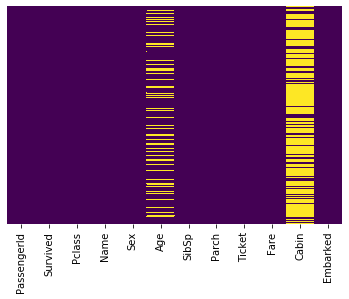

In [20]:
sns.heatmap(h.isnull(),yticklabels=False,cbar=False,cmap='viridis')


to find the missing values create a heatmap.If the data is missing > 50% remove the column

In [25]:
h[h['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [0]:
# h.drop([61,829],axis=0,inplace=True)

In [27]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 130.3+ KB


0    549
1    340
Name: Survived, dtype: int64


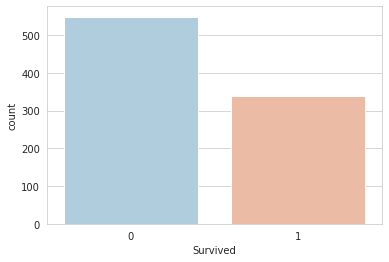

In [31]:
print(h.Survived.value_counts())
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=h,palette='RdBu_r')

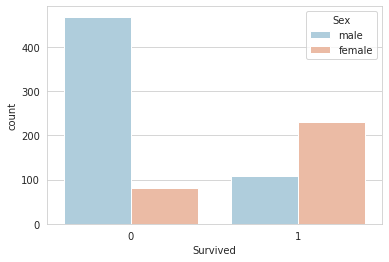

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=h,palette='RdBu_r')

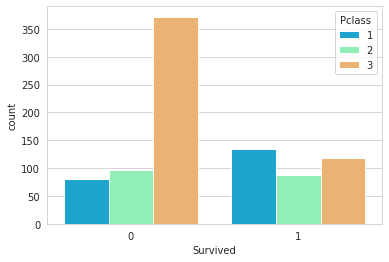

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=h,palette='rainbow')

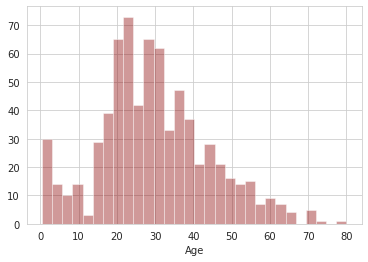

In [37]:
sns.distplot(h['Age'].dropna(),kde=False,color='darkred',bins=30)

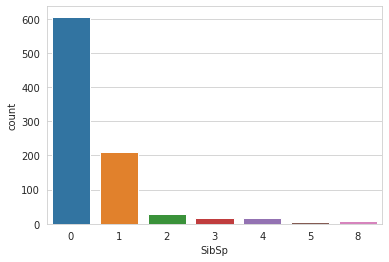

In [38]:
sns.countplot(x='SibSp',data=h)

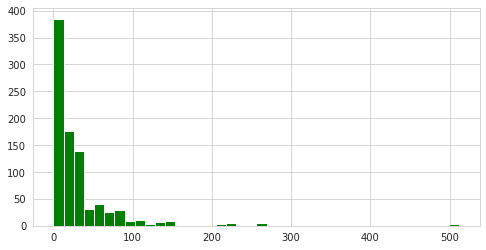

In [39]:
h['Fare'].hist(color='green',bins=40,figsize=(8,4))

**Data cleaning**

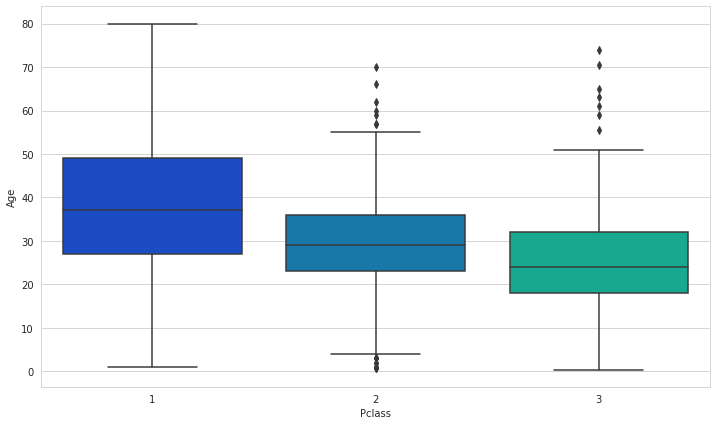

In [40]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=h,palette='winter')

In [0]:
def FillnullAge(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass ==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age




In [48]:
h['Age']=h[['Age','Pclass']].apply(FillnullAge,axis=1)
h['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

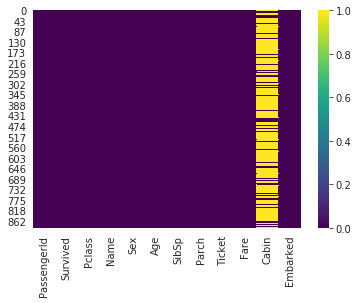

In [50]:
sns.heatmap(h.isnull(),cmap='viridis')

In [0]:
h.drop(['Cabin'],axis=1,inplace=True)

In [52]:
h.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
sex=pd.get_dummies(h['Sex'],drop_first=True)
embark=pd.get_dummies(h['Embarked'],drop_first=True)

In [55]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [0]:
h.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [57]:
h.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [0]:
h=pd.concat([h,sex,embark],axis = 1)

In [59]:
h.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


**Building A Logistic Regression Model**


**Train Test Split**

In [0]:
# h.drop(['PassengerId'],axis=1,inplace=True)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(h.drop('Survived',axis =1),h['Survived'],test_size=0.30,random_state=101)

In [0]:
from sklearn.linear_model import LogisticRegression

In [70]:
lg = LogisticRegression(solver='lbfgs')
lg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = lg.predict(X_test)

In [72]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[147  16]
 [ 30  74]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [73]:
acc =  (147+74)/(147+74+16+30)
acc


0.8277153558052435